## Perform standard imports and load datasets

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose      
from pmdarima import auto_arima                              

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Inspect the data, create a DatetimeIndex

In [2]:
df = pd.read_csv('order.csv', parse_dates = ['date'])
df.head()

,num_of_orders,date
0,NaN,2021-04-01
1,93.14,2021-04-02
2,92.97,2021-04-03
3,93.12,2021-04-04
4,93.20,2021-04-05


In [3]:
df.set_index('date', inplace=True)

In [4]:
#df2.index.asfreq('D')
df.freq = 'D'
df.head()

,num_of_orders
date,
2021-04-01,NaN
2021-04-02,93.14
2021-04-03,92.97
2021-04-04,93.12
2021-04-05,93.20


In [5]:
#Fill the missing values with preceding vs succeeding values
df = df.bfill().ffill()
df.head()

,num_of_orders
date,
2021-04-01,93.14
2021-04-02,93.14
2021-04-03,92.97
2021-04-04,93.12
2021-04-05,93.20


In [6]:
#Set Column to analyse
col_x = "num_of_orders"

In [7]:
#order are in hundreds 
df[col_x] = 100 * df[col_x]

### Plot the source data

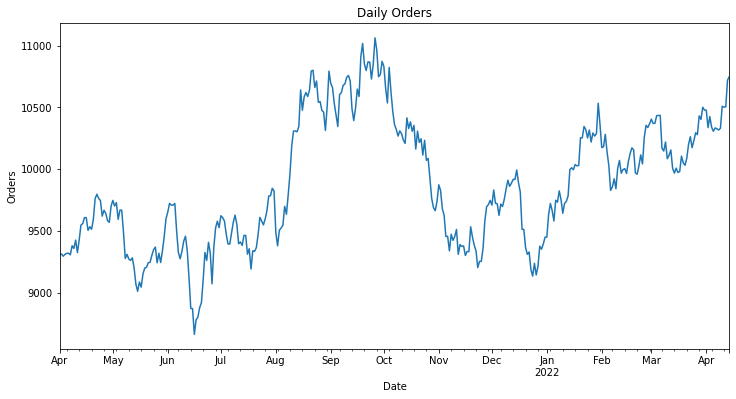

In [8]:
title = 'Daily Orders'
ylabel= 'Orders'
xlabel='Date'

ax = df[col_x].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### Run an ETS Decomposition

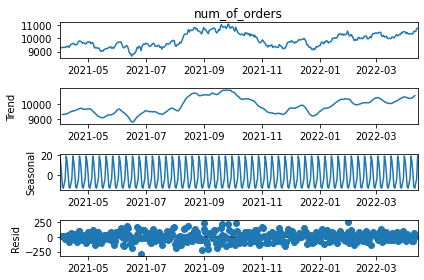

In [9]:
result = seasonal_decompose(df[col_x], model='add')
result.plot();

In [10]:
#Getting min and max of column
max_x = df[col_x].max()
min_x = df[col_x].min()
range_x = max_x - min_x
print(min_x, max_x, range_x)

8665.0 11062.0 2397.0


Looking at "seasonal", we can clearly see there a seasonality in our data.
The Seasonality seems to be too small to statistically significant, since the range of data is way higher than seasonality shown.

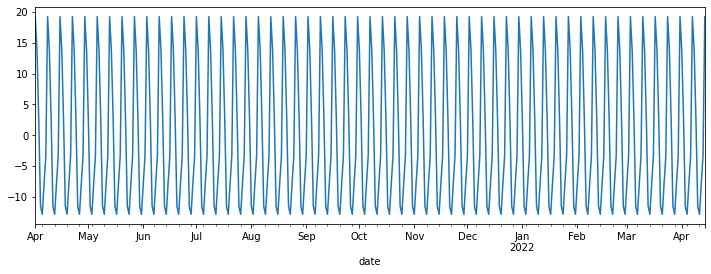

In [11]:
#plotting seasonaly up closely
result.seasonal.plot(figsize=(12,4));

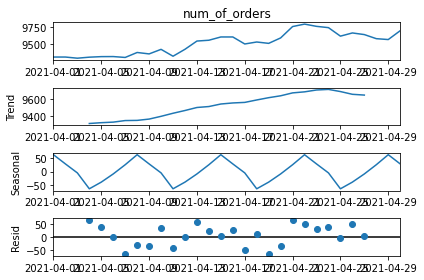

In [12]:
# Looking at seasonality in first month
result2 = seasonal_decompose(df[col_x].iloc[:30], model='add')
result2.plot();

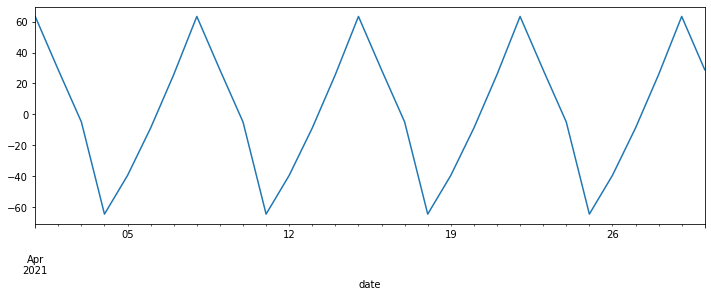

In [13]:
result2.seasonal.plot(figsize=(12,4));

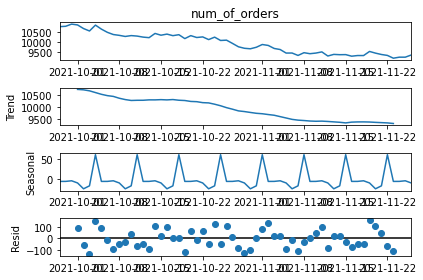

In [14]:
# Looking at seasonality in 7th month
result3 = seasonal_decompose(df[col_x].iloc[180:240], model='add')
result3.plot();

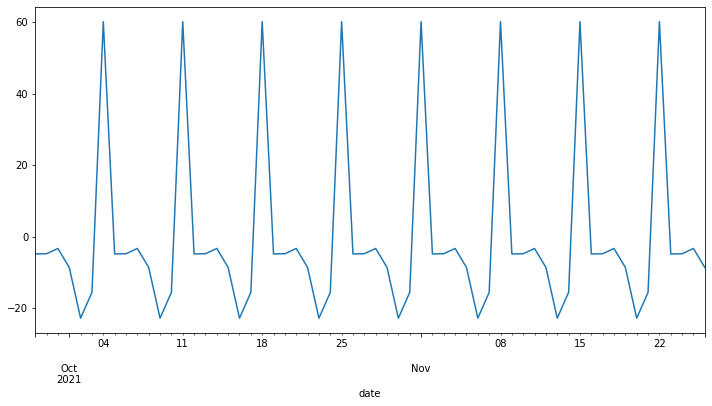

In [15]:
result3.seasonal.plot(figsize=(12,6));

Although small in scale compared to the overall values, there is a definite weekly seasonality.
For non perishable FMCG, this seasonality should not affect production, but rather the daily supply of product.
Since the manufacturer, supplies the products twice a week to all outlets, the seasonality should also not affect this operation.

### Next stage is to use the collected sentiments for the last month from all tweets to see if sentiments can have an effect in orders placed